In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data,test_labels) = imdb.load_data(num_words=10000)

In [ ]:
len(train_data)

25000

In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

Here we restrict oursleves to the top 10 000 most frequent words.
As shown below no word index is more than 10 000.

In [ ]:
max([max(sequence) for sequence in train_data])

9999

# Data preparation

1. Decoding reviews


In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_review = ''.join([reverse_word_index.get(i-3, "?") for i in train_data[0]])

2. Encoding integer sequences via multi-hot encoding for neural network learning

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1
  return results


x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Building the model

1. Model architecture

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([layers.Dense(16, activation='relu')
                      ,layers.Dense(16, activation='relu'),
                          layers.Dense(1, activation = 'sigmoid')])



model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])


 2. Creating a validation set

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

 3. Training the model

*train the model using 20 epochs on all training data using mini batches of 400 samples. We also measure the validation error.*

In [ ]:
history = model.fit(partial_x_train,partial_y_train,epochs=20, batch_size=512,
                    validation_data= (x_val,y_val))



Epoch 1/20
30/30 [==============================] - 4s 104ms/step - loss: 0.5433 - accuracy: 0.7728 - val_loss: 0.4355 - val_accuracy: 0.8398
Epoch 2/20
30/30 [==============================] - 2s 51ms/step - loss: 0.3442 - accuracy: 0.8901 - val_loss: 0.3323 - val_accuracy: 0.8751
Epoch 3/20
30/30 [==============================] - 1s 49ms/step - loss: 0.2526 - accuracy: 0.9149 - val_loss: 0.3077 - val_accuracy: 0.8773
Epoch 4/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2027 - accuracy: 0.9313 - val_loss: 0.2784 - val_accuracy: 0.8876
Epoch 5/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1720 - accuracy: 0.9412 - val_loss: 0.2763 - val_accuracy: 0.8891
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1428 - accuracy: 0.9540 - val_loss: 0.2860 - val_accuracy: 0.8850
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1241 - accuracy: 0.9603 - val_loss: 0.3296 - val_accuracy: 0.8726
Epoch 8/20
3

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

4. Plotting training and validation metrics

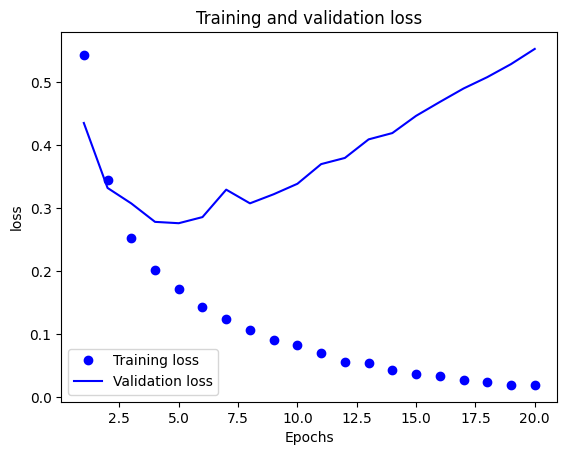

In [ ]:
import matplotlib.pyplot as plt
loss_val = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_val)+1)
plt.plot(epochs, loss_val, 'bo', label = 'Training loss ')
plt.plot(epochs, val_loss_values, 'b', label= 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


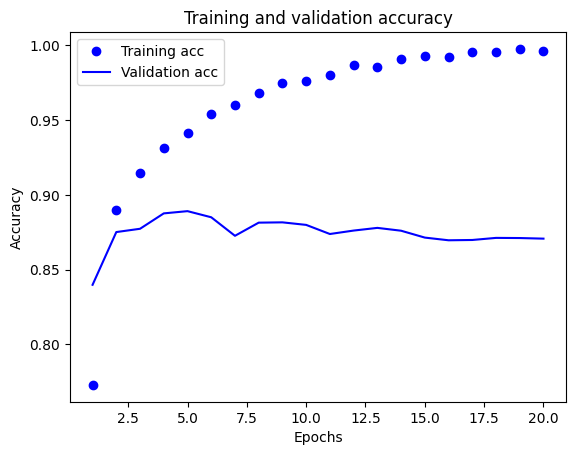

In [ ]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In the above two graphs, we observe that the validation loss seems to increase at the 4th epoch . Similarly, the validation acccuracy seems to reach a minimum at the 4th epoch. After the 4th epoch, the model seems to overfit the training data. Thus, we will train our model using 4 epochs

5. Training optimal model given by 4 epochs

In [ ]:
model_two = keras.Sequential([layers.Dense(16, activation='relu'), layers.Dense(16, activation = 'relu' ),
                              layers.Dense(1, activation='sigmoid')])

model_two.compile(optimizer= 'rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model_two.fit(x_train,y_train, epochs=4, batch_size=812)
results = model_two.evaluate(x_test,y_test)

Epoch 1/4


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2532, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5822, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 16) vs (None, 1)).


# Generate predicitons on new data

In [ ]:
model_two.predict(x_test)[0][0]


The first review has a likelihood of 30% of being positive